

If running this demo in Google Colab, **Switch to GPU**:



*   Go to Edit → Notebook Settings
*   Choose GPU from Hardware Accelerator






# Installing SpinWalk


**Steps:**
*   Installing the libraries needed in SpinWalk
*   Cloning the project, build and install it
*   Test it runs and displays help menu

In [15]:
%%bash
# install dependencies
apt-get install -y libboost-all-dev libhdf5-dev libtbb-dev

# clone SpinWalk
rm -rf SpinWalk
git clone --depth 1 https://github.com/aghaeifar/SpinWalk.git &> /dev/null

# build it
cd SpinWalk
cmake -B ./build
cmake --build ./build --config Release
cmake --install ./build

# test it runs and show help menu
echo "Running SpinWalk..."
spinwalk

Reading package lists...
Building dependency tree...
Reading state information...
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
libtbb-dev is already the newest version (2021.5.0-7ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
-- CMake version: 3.30.1
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found HDF5: /usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5_cpp.so;/usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5.so;/usr/lib/x8

# Generating Phantom

Here, **SpinWalk** generates a phantom containing cylinders with a radius of 8 µm, mimicking vessels with oxygeneation level of 78% and 85%. These cylinders will occupy 4% of the total volume, and the phantom will have a field of view (FoV) of 600 µm. The phantom will be stored in the `phantoms` folder.

In [1]:
%%bash
# Define the output directory
output_dir="./phantoms"
mkdir -p "$output_dir"

vol_frac=4
oxy_level_act=0.85
oxy_level_rest=0.78
dChi=0.00000011
orientation=90
resolution=600
fov=600
radius=8

# Define the output file
output_file_rest="${output_dir}/r${radius}_Y${oxy_level_rest}_vf${vol_frac}_ori${orientation}_fov${fov}_res${resolution}.h5"
# Call the command with the variable parameter and redirect the output
spinwalk phantom -c -r "$radius" -v "$vol_frac" -f "$fov" -z "$resolution" -d "$dChi" -y "$oxy_level_rest" -n "$orientation" -e 0 -o "$output_file_rest"

# Define the output file
output_file_act="${output_dir}/r${radius}_Y${oxy_level_act}_vf${vol_frac}_ori${orientation}_fov${fov}_res${resolution}.h5"
# Call the command with the variable parameter and redirect the output
spinwalk phantom -c -r "$radius" -v "$vol_frac" -f "$fov" -z "$resolution" -d "$dChi" -y "$oxy_level_act" -n "$orientation" -e 0 -o "$output_file_act"

# check phantoms are there
ls -l --block-size=M ./phantoms


 
 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                                                    

SpinWalk ver. 1.15.0
Log file location: "/DATA/aaghaeifar/Nextcloud/Projects/microvascular/SpinWalk/demo/spinwalk_0.log"
Phantom information:
  FOV: 600 um
  Resolution: 600
  Blood parameters: dChi=1.1e-07, Y=0.78
  Filename: ./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5
  Seed: 0
  Radius: 8 um
  Volume Fraction: 4
  Orientation: 90 rad
Creating grid...
Grid created successfully! Elapsed Time: 2 s
Generating coordinates...for target BVF = 4% ...
75 coordinates generated successfully! Elapsed Time: 0 s
Generating cylinders...
B0 direction: [1, 0, -4.37114e-08]
Allocating memory...Done!
Generating...
[===

# Creating Configuration File

The default configuration file, contains all parameters, will be downloaded and used as parent for custom config file. We create config files to simulate GRE, SE, and bSSFP sequence.

Sequence parameters and tissue parameters, such as relaxation times and diffusivity, are specified in the default configuration file. Only the parameters provided in the subsequent configuration files for GRE, SE, and bSSFP will override these defaults.

In [3]:
%%bash
rm *.ini*
wget https://raw.githubusercontent.com/aghaeifar/SpinWalk/main/config/config_default.ini &> /dev/null

output_dir="./outputs"
mkdir -p "$output_dir"

## GRE configuration file

In [15]:
%%bash
# config file
output_file="gre.ini"
# Write simulation settings to config file
cat <<EOF > "$output_file"
SEQ_NAME = gre
[PARENT]
PARENT_CONFIG = config_default.ini
[FILES]
OUTPUT_DIR  = ./outputs
PHANTOM[0]  = ./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5
PHANTOM[1]  = ./phantoms/r8_Y0.85_vf4_ori90_fov600_res600.h5
[SCAN_PARAMETERS]
TR = 21000
TE[0] = 20000
RF_FA[0] = 90.0
RF_PH[0] = 0.0
RF_T[0] = 0
[SIMULATION_PARAMETERS]
SEED = 10
NUMBER_OF_SPINS = 100000
B0 = 9.4
EOF

# show content
cat gre.ini


SEQ_NAME = gre
[PARENT]
PARENT_CONFIG = config_default.ini
[FILES]
OUTPUT_DIR  = ./outputs
PHANTOM[0]  = ./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5
PHANTOM[1]  = ./phantoms/r8_Y0.85_vf4_ori90_fov600_res600.h5
[SCAN_PARAMETERS]
TR = 21000
TE[0] = 20000
RF_FA[0] = 90.0
RF_PH[0] = 0.0
RF_T[0] = 0
[SIMULATION_PARAMETERS]
SEED = 10
NUMBER_OF_SPINS = 100000
B0 = 9.4


## SE configuration file


In [16]:
%%bash
# config file
output_file="se.ini"
# Write simulation settings to config file
cat <<EOF > "$output_file"
SEQ_NAME = se
[PARENT]
PARENT_CONFIG = config_default.ini
[FILES]
OUTPUT_DIR  = ./outputs
PHANTOM[0]  = ./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5
PHANTOM[1]  = ./phantoms/r8_Y0.85_vf4_ori90_fov600_res600.h5
[SCAN_PARAMETERS]
TR = 31000
TE[0] = 30000
RF_FA[0] = 90.0
RF_FA[1] = 180.0
RF_PH[0] = 0.0
RF_PH[1] = 90.0
RF_T[0] = 0
RF_T[1] = 15000
[SIMULATION_PARAMETERS]
SEED = 10
NUMBER_OF_SPINS = 100000
B0 = 9.4
EOF

# show content
cat se.ini

SEQ_NAME = se
[PARENT]
PARENT_CONFIG = config_default.ini
[FILES]
OUTPUT_DIR  = ./outputs
PHANTOM[0]  = ./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5
PHANTOM[1]  = ./phantoms/r8_Y0.85_vf4_ori90_fov600_res600.h5
[SCAN_PARAMETERS]
TR = 31000
TE[0] = 30000
RF_FA[0] = 90.0
RF_FA[1] = 180.0
RF_PH[0] = 0.0
RF_PH[1] = 90.0
RF_T[0] = 0
RF_T[1] = 15000
[SIMULATION_PARAMETERS]
SEED = 10
NUMBER_OF_SPINS = 100000
B0 = 9.4


## bSSFP configuration file


In [17]:
%%bash
# config file
output_file="bssfp.ini"
# Write simulation settings to config file
cat <<EOF > "$output_file"
SEQ_NAME = bssfp
[PARENT]
PARENT_CONFIG = config_default.ini
[FILES]
OUTPUT_DIR  = ./outputs
PHANTOM[0]  = ./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5
PHANTOM[1]  = ./phantoms/r8_Y0.85_vf4_ori90_fov600_res600.h5
[SCAN_PARAMETERS]
TR = 10000
TE[0] = 5000
RF_FA[0] = 20.0
RF_PH[0] = 0.0
RF_T[0] = 0
DUMMY_SCAN  = -1
PHASE_CYCLING = 180
[SIMULATION_PARAMETERS]
SEED = 10
NUMBER_OF_SPINS = 100000
B0 = 9.4
EOF

# show content
cat bssfp.ini

SEQ_NAME = bssfp
[PARENT]
PARENT_CONFIG = config_default.ini
[FILES]
OUTPUT_DIR  = ./outputs
PHANTOM[0]  = ./phantoms/r8_Y0.78_vf4_ori90_fov600_res600.h5
PHANTOM[1]  = ./phantoms/r8_Y0.85_vf4_ori90_fov600_res600.h5
[SCAN_PARAMETERS]
TR = 10000
TE[0] = 5000
RF_FA[0] = 20.0
RF_PH[0] = 0.0
RF_T[0] = 0
DUMMY_SCAN  = -1
PHASE_CYCLING = 180
[SIMULATION_PARAMETERS]
SEED = 10
NUMBER_OF_SPINS = 100000
B0 = 9.4


# Simulation

SpinWalk will read all the provided config files and simulate them sequentially.

In [18]:
%%bash
spinwalk sim -c gre.ini se.ini bssfp.ini

 
 ____            _          __        __          _   _        
/ ___|   _ __   (_)  _ __   \ \      / /   __ _  | | | | __    
\___ \  | '_ \  | | | '_ \   \ \ /\ / /   / _` | | | | |/ /    
 ___) | | |_) | | | | | | |   \ V  V /   | (_| | | | |   <     
|____/  | .__/  |_| |_| |_|    \_/\_/     \__,_| |_| |_|\_\    
        |_|                                                    

SpinWalk ver. 1.15.0
Log file location: "/DATA/aaghaeifar/Nextcloud/Projects/microvascular/SpinWalk/demo/spinwalk_0.log"
Running simulation for 3 config(s)...

<gre.ini>
Simulation starts...
Loading phantom: r8_Y0.78_vf4_ori90_fov600_res600.h5
[====================================================================================================] 100% 
Simulation took 1.3 sec., everything else took 1.6 sec.
Saving the results to disk.
Loading phantom: r8_Y0.85_vf4_ori90_fov600_res600.h5
[====================================================================================================] 100% 
Simulation too

In [9]:
%%bash
# cat spinwalk_0.log
ls ./outputs

bssfp_r8_Y0.78_vf4_ori90_fov600_res600.h5
bssfp_r8_Y0.85_vf4_ori90_fov600_res600.h5
gre_r8_Y0.78_vf4_ori90_fov600_res600.h5
gre_r8_Y0.85_vf4_ori90_fov600_res600.h5
se_r8_Y0.78_vf4_ori90_fov600_res600.h5
se_r8_Y0.85_vf4_ori90_fov600_res600.h5


In [19]:
import os
import numpy as np
import h5py

tissue_type = 0 # 0 = extra-vascular, 1 = intra-vascular, [0,1] = combined

results_dir = './outputs/'

def read_results(filename):
    signal_magnitude = []
    filepath = os.path.join(results_dir, f'{filename}.h5')
    with h5py.File(filepath, 'r') as h5:
        M = np.array(h5['M'])
        T = np.array(h5['T'])
        S = np.array(h5['scales'])
        for ids, s in enumerate(S):
            mask = (T[ids, :, 0, 0] == tissue_type)
            M_f = M[ids, mask, 0, :]
            M_f = np.mean(M_f[...,0:2], axis=0)
            signal_magnitude.append(np.linalg.norm(M_f))
    return signal_magnitude


############
radius = 8
oxy_level = ['0.78', '0.85']
signal_change = []
for iseq, seq_name in enumerate(['gre', 'se', 'bssfp']):
    signal_magnitude = []
    for o in oxy_level:
        filename = f'{seq_name}_r{radius}_Y{o}_vf4_ori90_fov600_res600'
        signal_magnitude.append(read_results(filename))
    signal_magnitude = np.array(signal_magnitude)
    signal_change.append(100 * (1 - signal_magnitude[0,:] / signal_magnitude[1,:]))


with h5py.File(os.path.join(results_dir, f'{filename}.h5'), 'r') as h5:
    scales = np.array(h5['scales'])
    

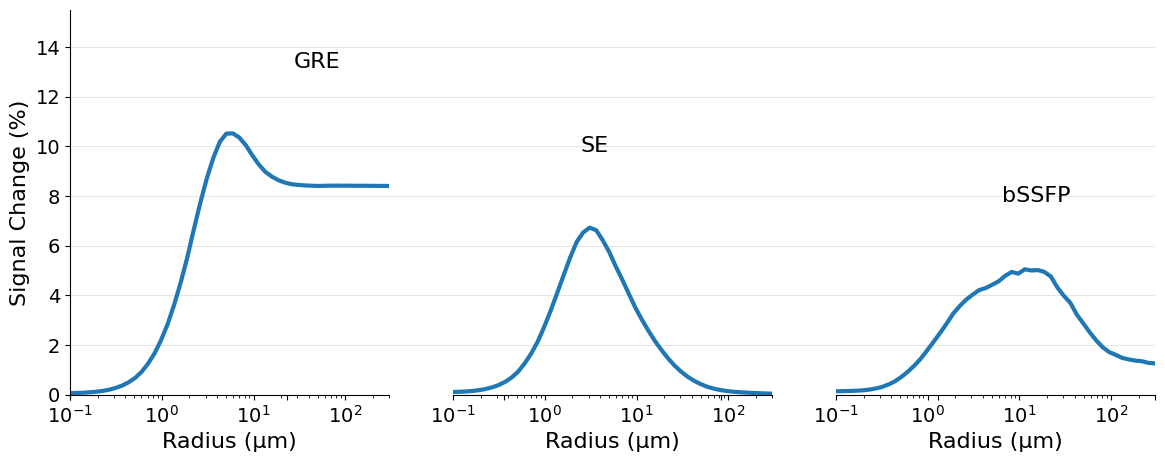

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['svg.fonttype'] = 'none' # to embed fonts in SVG output

# Create data
x = radius * scales.squeeze()
x = x.reshape(-1)

plt.close('all')
BV   = [2, 5]
cmap = plt.get_cmap('Set2')
colors = cmap(np.linspace(0, 1, len(signal_change_gre)))
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
for i, (ax, sig) in enumerate(zip(axs, signal_change)):
    ax.plot(x, sig, linewidth=3)
    ax.set_xlabel('Radius (µm)', fontsize=16)
    ax.set_xscale('log')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim([0.1, 300])
    ax.set_ylim([0, 15.5])
    ax.patch.set_visible(False)

    ax.tick_params(axis='both', which='major', labelsize=14)

    if i == 0:
        ax.set_ylabel('Signal Change (%)', fontsize=16)
        ax.text(0.7, 0.85, 'GRE', transform=ax.transAxes, fontsize=16)
    if i == 1:
        ax.text(0.4, 0.63, 'SE', transform=ax.transAxes, fontsize=16)
    if i == 2:
        ax.text(0.52, 0.5, 'bSSFP', transform=ax.transAxes, fontsize=16)
    if i != 0:
        ax.set_yticklabels([])
        ax.spines['left'].set_visible(False)
        ax.tick_params(axis='y', left=False)

# shared axes for the grid
ax_g = fig.add_subplot(111, zorder=-1)
ax_g.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax_g.tick_params(labelleft=False, labelbottom=False, left=False, right=False )
ax_g.set_ylim([0, 15.5])
ax_g.yaxis.grid(True, linewidth=0.7, color='#e5e5e5')
ax_g.patch.set_visible(False)

